In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare, uniform, kstest
from pcg import PCG
import pandas as pd
import seaborn as sns

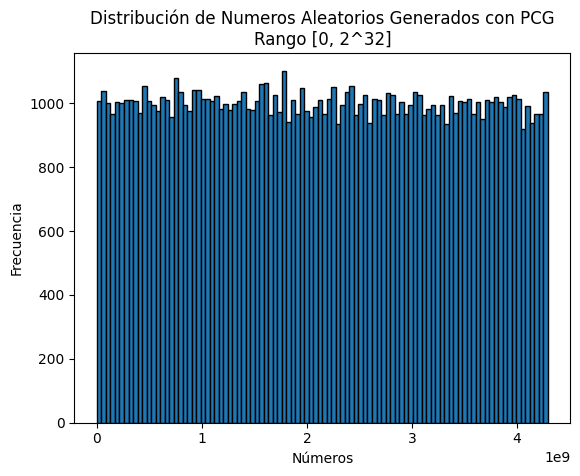

In [2]:
"""
    Histograma:
    
    Se busca comprobar que la frecuencia obtenida por cada número en el eje x sea similar
    de esta forma la probabilidad de obtener cualquier número seguiría una distribución uniforme.
"""
def create_histogram():
    seed = int(time.time() * 1_000)
    pcga = PCG(seed)
    numbers = [pcga.random() for _ in range(100_000)]

    plt.hist(numbers, bins=100, edgecolor="black")
    plt.title("Distribución de Numeros Aleatorios Generados con PCG\nRango [0, 2^32]")
    plt.xlabel("Números")
    plt.ylabel("Frecuencia")
    plt.plot()

create_histogram()

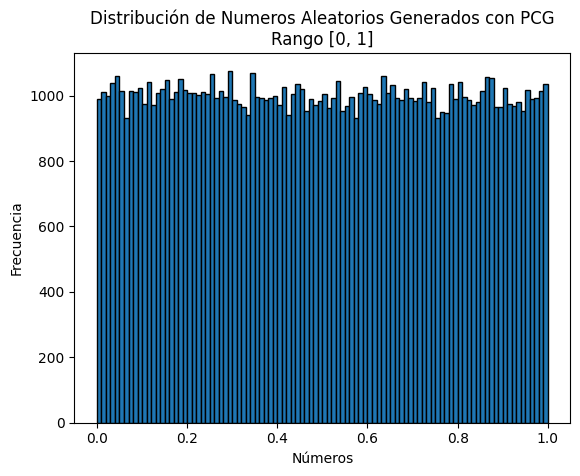

In [3]:
"""
    Histograma:
    
    Se busca comprobar que la frecuencia obtenida por cada número en el eje x sea similar
    de esta forma la probabilidad de obtener cualquier número seguiría una distribución uniforme.
"""
def create_normalized_histogram():
    seed = int(time.time() * 1_000)
    pcga = PCG(seed)
    numbers = [pcga.random_normalized() for _ in range(100_000)]

    plt.hist(numbers, bins=100, edgecolor="black")
    plt.title("Distribución de Numeros Aleatorios Generados con PCG\nRango [0, 1]")
    plt.xlabel("Números")
    plt.ylabel("Frecuencia")
    plt.plot()

create_normalized_histogram()

In [4]:
"""
    Test estadístico 01 para comprobar que el algoritmo sigue una distribución uniforme
    h0: La distribución de la muestra sigue una distribucion uniforme
    h1: La distribución de la muestra no sigue una distribucion uniforme

    - Si rechazamos la hipotesis nula diremos que encontramos suficiente evidencia para
      decir que la misma es falsa con una probabilidad alfa (significancia) de equivocarnos.
    - Si no rechazamos la hipótesis nula diremos que no encontramos suficiente evidencia
      en las muestras para rechazarla y no se puede concluir que la distribución no sea 
      uniforme con ese nivel de significancia.
"""
def chisquare_test():
    seed = int(time.time() * 1_000)
    pcga = PCG(seed)
    numbers = [pcga.random_normalized() for _ in range(100_000)]
    
    num_bins = 100
    min_val = 0
    max_val = 1
    bin_edges = num_bins + 1
    significance = 0.05
    bins = np.linspace(min_val, max_val, bin_edges)
    counts, _ = np.histogram(numbers, bins=bins)
    expected_counts = [len(numbers) / num_bins] * num_bins
    
    dsquare, p_value = chisquare(counts, f_exp=expected_counts)
    p_value = round(p_value, 2)
    dsquare = round(dsquare, 2)
    
    print(f"P valor: {p_value:.2f}")
    print(f"D cuadrado: {dsquare:.2f}")
    print()
    
    if p_value >= significance:
        print("[*] No hay suficiente evidencia para rechazar la hipótesis nula")
        print(f"[*] P valor = {p_value:.2f} > alfa = {significance:.2f}")
    else:
        print("[*] Se rechaza la hipotesis nula")
        print(f"[*] P valor = {p_value:.2f} < alfa = {significance:.2f}")

chisquare_test()

P valor: 0.58
D cuadrado: 95.46

[*] No hay suficiente evidencia para rechazar la hipótesis nula
[*] P valor = 0.58 > alfa = 0.05


# Test 2 - Kolmogorov

In [44]:
"""
    Test estadístico 02 para comprobar que el algoritmo sigue una distribución uniforme
    h0: La distribución de la muestra sigue una distribucion uniforme
    h1: La distribución de la muestra no sigue una distribucion uniforme

    - Si rechazamos la hipotesis nula diremos que encontramos suficiente evidencia para
      decir que la misma es falsa con una probabilidad alfa (significancia) de equivocarnos.
    - Si no rechazamos la hipótesis nula diremos que no encontramos suficiente evidencia
      en las muestras para rechazarla y no se puede concluir que la distribución no sea 
      uniforme con ese nivel de significancia.
"""
def kolmogorov_test(data):
    # Realizar el test de Kolmogorov-Smirnov
    # Comparamos la muestra con una distribución uniforme
    ks_stat, p_val = kstest(data, 'uniform')

    print('─' * 10)
    print(f'Tamaño de la muestra: {len(data):_}')
    print(f'Estadístico KS: {ks_stat:.4f}')
    print(f'P valor: {p_val:.4f}')

    # Interpretar el resultado
    alpha = 0.05
    if p_val < alpha:
        print("[*] Rechazamos la hipótesis nula: la muestra no sigue una distribución uniforme.")
        print(f"[*] P valor = {p_val:.2f} < alfa = {alpha:.2f}")
    else:
        print("[*] No rechazamos la hipótesis nula: la muestra sigue una distribución uniforme.")
        print(f"[*] P valor = {p_val:.2f} > alfa = {alpha:.2f}")

In [60]:
"""
    Graficamos la distribución acumulativa teórica vs la empírica

    (El argumento ax es opcional por si se está haciendo un subplot)
"""
def plot_cdf(data, ax = None):
    if not ax:
        ax = plt.gca()
    
    df = pd.DataFrame({'data': data})

    # Calcular la función de distribución acumulativa teórica
    # Para una distribución uniforme
    x = np.linspace(0, 1, len(data))
    cdf_theoretical = uniform.cdf(x, loc=0, scale=1)

    # Graficar la función de distribución empírica
    sns.ecdfplot(df['data'], label='Empirical CDF', color='blue', ax=ax)

    # Graficar la función de distribución acumulativa teórica
    ax.plot(x, cdf_theoretical, label='Theoretical CDF', color='red', linestyle='--')

    # Añadir detalles al gráfico
    ax.set_title(f"Empírica vs Teórica (n={len(data):_})")
    ax.set_xlabel('Valor')
    ax.set_ylabel('Probabilidad Acumulada')
    ax.legend()

In [61]:
# Generamos muestras con nuestro algoritmo
seed = int(time.time() * 1_000)
pcga = PCG(seed)

sample_1 = [pcga.random_normalized() for _ in range(100)]
sample_2 = [pcga.random_normalized() for _ in range(1_000)]
sample_3 = [pcga.random_normalized() for _ in range(10_000)]

In [62]:
# Test de Kolmogorov
kolmogorov_test(sample_1)
kolmogorov_test(sample_2)
kolmogorov_test(sample_3)

──────────
Tamaño de la muestra: 100
Estadístico KS: 0.0690
P valor: 0.7013
[*] No rechazamos la hipótesis nula: la muestra sigue una distribución uniforme.
[*] P valor = 0.70 > alfa = 0.05
──────────
Tamaño de la muestra: 1_000
Estadístico KS: 0.0327
P valor: 0.2312
[*] No rechazamos la hipótesis nula: la muestra sigue una distribución uniforme.
[*] P valor = 0.23 > alfa = 0.05
──────────
Tamaño de la muestra: 10_000
Estadístico KS: 0.0082
P valor: 0.5035
[*] No rechazamos la hipótesis nula: la muestra sigue una distribución uniforme.
[*] P valor = 0.50 > alfa = 0.05


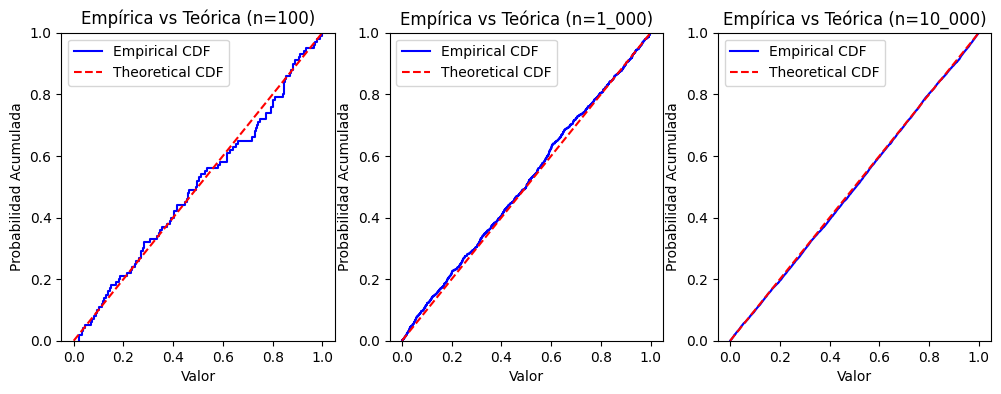

In [63]:
fig, axis = plt.subplots(1, 3, figsize=(12, 4), squeeze=False)

plot_cdf(sample_1, axis[0][0])
plot_cdf(sample_2, axis[0][1])
plot_cdf(sample_3, axis[0][2])

# Mostrar el gráfico
plt.show() 